In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')
from datetime import datetime

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [47]:
A = pd.read_csv('Company A - Data.csv')

In [48]:
A.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [50]:
A = A.drop(['Unnamed: 0'],axis=1)

In [51]:
A["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [52]:
A["Churn"].value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

In [53]:
A.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


Text(0.5, 1.0, 'Number of Customers by Contract Type')

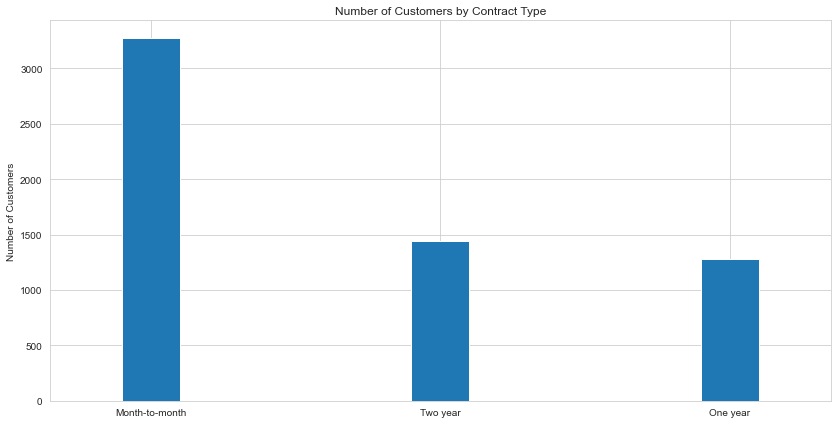

In [54]:
ax = A['Contract'].value_counts().T.plot(kind = 'bar',rot = 0, 
                                         width = 0.2,
                                        
                                        figsize = (14,7))
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

Text(0.5, 1.0, 'Number of Customers who churned')

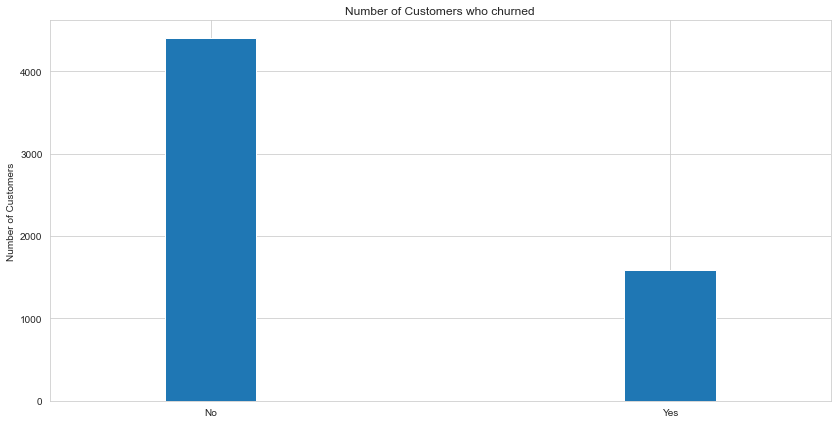

In [55]:
ax = A['Churn'].value_counts().T.plot(kind = 'bar',rot = 0, 
                                         width = 0.2,
                                    
                                        figsize = (14,7))
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers who churned')

# Checking customers who leave by contract type

Text(0.5, 1.0, 'Churn Rate by Contract')

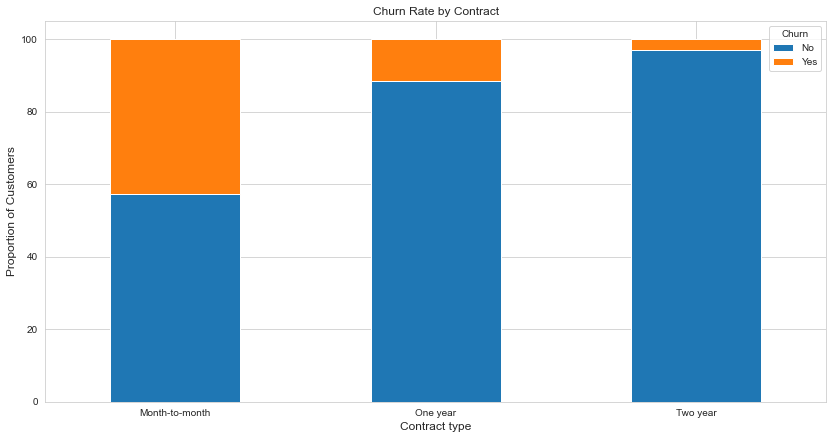

In [56]:
import matplotlib.ticker as mtick

contract_churn = A.groupby(['Contract','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                              stacked = True,
                                                                rot = 0, 
                                                                figsize = (14,7),
                                                                )
plt.ylabel('Proportion of Customers',fontsize = 'large')
plt.xlabel('Contract type', fontsize = 'large')
plt.title('Churn Rate by Contract')

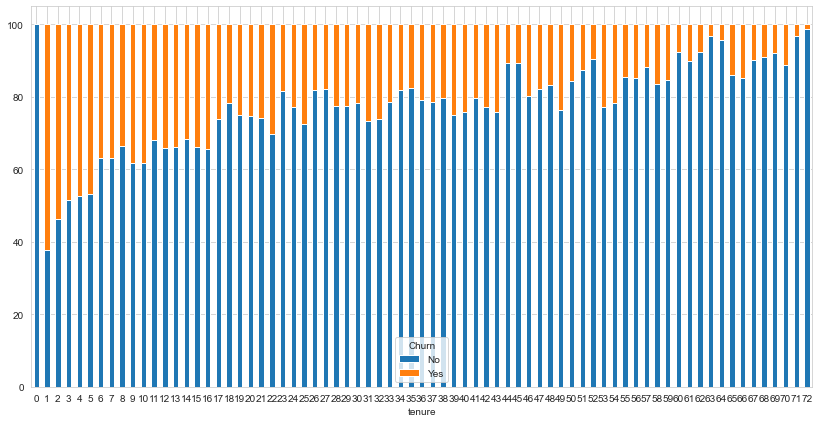

In [57]:
contract_churn = A.groupby(['tenure','Churn']).size().unstack()
colors  = ['pink','hotpink']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                              stacked = True,
                                                                rot = 0, 
                                                                figsize = (14,7),
                                                                )

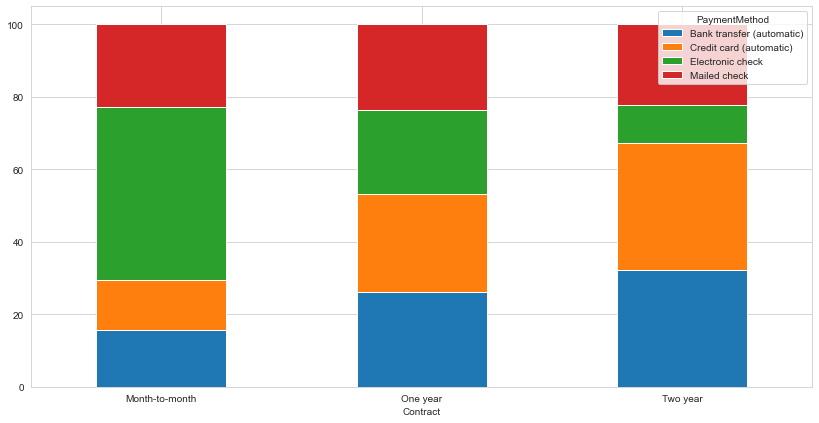

In [58]:
contract_churn = A.groupby(['Contract','PaymentMethod']).size().unstack()

colors  = ['pink','hotpink', 'plum', 'crimson']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                              stacked = True,
                                                                rot = 0, 
                                                                figsize = (14,7),
                                                               )

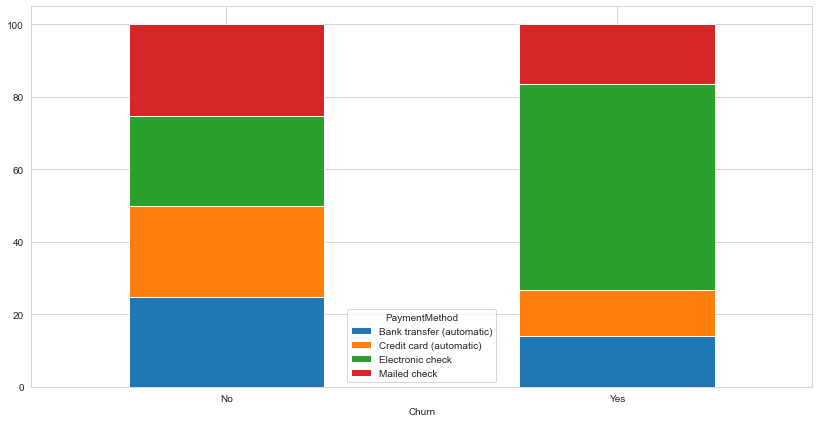

In [59]:
contract_churn = A.groupby(['Churn','PaymentMethod']).size().unstack()

colors  = ['pink','hotpink', 'plum', 'crimson']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                              stacked = True,
                                                                rot = 0, 
                                                                figsize = (14,7),
                                                              )

In [60]:
#A['Partner'].replace(to_replace=[['Yes'], ['No']],value=[0,1],inplace=True)
#A['Dependents'].replace(to_replace=[['Yes'], ['No']],value=[0,1],inplace=True)
#A['PhoneService'].replace(to_replace=[['Yes'], ['No']],value=[0,1],inplace=True)
#A['PaperlessBilling'].replace(to_replace=[['Yes'], ['No']],value=[0,1],inplace=True)
#A['MultipleLines'].replace(to_replace=[['No'],['Yes'], ['No phone service']],value=[0,1,2],inplace=True)
#A['InternetService'].replace(to_replace=[['DSL'],['Fiber optic'], ['No']],value=[0,1,2],inplace=True)
#A['OnlineSecurity'].replace(to_replace=[['Yes'], ['No'], ['No internet service']],value=[0,1,2],inplace=True)
#A['OnlineBackup'].replace(to_replace=[['Yes'], ['No'], ['No internet service']],value=[0,1,2],inplace=True)
#A['DeviceProtection'].replace(to_replace=[['Yes'], ['No'], ['No internet service']],value=[0,1,2],inplace=True)
#A['TechSupport'].replace(to_replace=[['Yes'], ['No'], ['No internet service']],value=[0,1,2],inplace=True)
#A['StreamingTV'].replace(to_replace=[['Yes'], ['No'], ['No internet service']],value=[0,1,2],inplace=True)
#A['StreamingMovies'].replace(to_replace=[['Yes'], ['No'], ['No internet service']],value=[0,1,2],inplace=True)
#A['Contract'].replace(to_replace=[['Month-to-month'],['One year'], ['Two year']],value=[0,1,2],inplace=True)
#A['PaymentMethod'].replace(to_replace=[['Electronic check'],['Mailed check'],['Bank transfer (automatic)'],['Credit card (automatic)']],value=[0,1,2,3],inplace=True)

In [61]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [62]:
le = LabelEncoder()

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in A.columns[1:]:
    if A[col].dtype == 'object':
        if len(list(A[col].unique())) <= 2:
            le.fit(A[col])
            A[col] = le.transform(A[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


In [63]:
cust = A["customerID"]

data = A.drop(columns="customerID")

# convert rest of categorical variable into dummy

data= pd.get_dummies(data)

#Rejoin userid to dataset (column concatenation)

data = pd.concat([data, cust], axis = 1)

In [64]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No,...,TotalCharges_994.55,TotalCharges_994.8,TotalCharges_995.35,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,customerID
0,0,0,1,0,1,0,1,29.85,0,0,...,0,0,0,0,0,0,0,0,0,7590-VHVEG
1,1,0,0,0,34,1,0,56.95,0,1,...,0,0,0,0,0,0,0,0,0,5575-GNVDE
2,1,0,0,0,2,1,1,53.85,1,1,...,0,0,0,0,0,0,0,0,0,3668-QPYBK
3,1,0,0,0,45,0,0,42.30,0,0,...,0,0,0,0,0,0,0,0,0,7795-CFOCW
4,0,0,0,0,2,1,1,70.70,1,1,...,0,0,0,0,0,0,0,0,0,9237-HQITU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,1,24,1,1,84.80,0,0,...,0,0,0,0,0,0,0,0,0,6840-RESVB
5982,0,0,1,1,72,1,1,103.20,0,0,...,0,0,0,0,0,0,0,0,0,2234-XADUH
5983,0,0,1,1,11,0,1,29.60,0,0,...,0,0,0,0,0,0,0,0,0,4801-JZAZL
5984,1,1,1,0,4,1,1,74.40,1,0,...,0,0,0,0,0,0,0,0,0,8361-LTMKD


In [65]:
cust = data["Churn"]

data = data.drop(columns="Churn")

In [66]:
#data.corr()

In [67]:
### change object columns to float here ####

In [68]:
#plt.figure(figsize =(20,10))
#correlation = dataset.corr()
#sns.heatmap(correlation, annot=True)

In [69]:
### need to change customerID column or drop it ####

#X = A.drop(['Churn','customerID'], axis=1)

In [70]:
#y = A["Churn"]

#X = A.drop(columns="Churn")
#X = A.drop(['Churn','customerID', 'gender'], axis=1)

In [71]:
#X= pd.get_dummies(X)

In [72]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,
                #                                    stratify=response, 
                 #                                   test_size = 0.2,
                      #                              random_state = 42)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(data, cust,
                                                    stratify=cust, 
                                                    test_size = 0.2, #use 0.9 if data is huge.
                                                    random_state = 0)

In [74]:
train_id = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])

test_id = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])

In [75]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train1 = scaler.fit_transform(X_train)
#X_test1 = scaler.fit_transform(X_test)

In [76]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/Users/Evelyn/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
from sklearn.metrics import f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )

In [78]:
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [79]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.803005,0.672269,0.503145,0.57554


Text(34.0, 0.5, 'True')

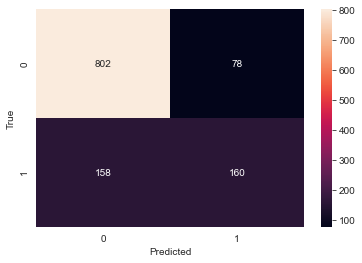

In [80]:
from sklearn import metrics
cnf_matrix = (metrics.confusion_matrix(y_test, y_pred))
cmap = sns.cubehelix_palette(50, hue=0.5, rot=0, light=0.9, as_cmap=True)
sns.heatmap(cnf_matrix,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')

In [81]:
from sklearn import feature_selection

In [82]:
feature_importances = pd.concat([pd.DataFrame(data.drop(columns = 'customerID').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

feature_importances.sort_values("coef", ascending = False)

,features,coef
32,Contract_Month-to-month,0.981716
33,Contract_One year,0.635524
12,InternetService_Fiber optic,0.485002
1415,TotalCharges_20.2,0.390483
1421,TotalCharges_20.5,0.331110
...,...,...
5,PhoneService,-0.247264
3,Dependents,-0.267560
8,MultipleLines_No,-0.316896
11,InternetService_DSL,-0.519008


Text(34.0, 0.5, 'True')

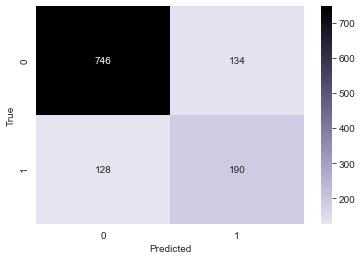

In [83]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5)
dec_tree= tree.fit(X_train, y_train)
tree_Pred = tree.predict(X_test).astype(int)

#Confusion Matrix 

from sklearn import metrics
cnf_matrix = (metrics.confusion_matrix(y_test, tree_Pred))
cmap = sns.cubehelix_palette(50, hue=0.5, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cnf_matrix,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('True')

In [84]:
from sklearn.metrics import f1_score, precision_score, recall_score
acc = accuracy_score(y_test, tree_Pred )
prec = precision_score(y_test, tree_Pred )
rec = recall_score(y_test, tree_Pred )
f1 = f1_score(y_test, tree_Pred )

In [85]:
results = pd.DataFrame([['Decision tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [86]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.781302,0.58642,0.597484,0.5919


In [87]:
feature_importances = pd.concat([pd.DataFrame(data.drop(columns = 'customerID').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(tree.feature_importances_), columns = ["feature_importances_"])
           ],axis = 1)

feature_importances.sort_values("feature_importances_", ascending = False)

,features,feature_importances_
32,Contract_Month-to-month,0.507160
4,tenure,0.137571
14,OnlineSecurity_No,0.104947
7,MonthlyCharges,0.075345
11,InternetService_DSL,0.060443
...,...,...
1889,TotalCharges_25.7,0.000000
1888,TotalCharges_25.4,0.000000
1887,TotalCharges_25.35,0.000000
1886,TotalCharges_25.3,0.000000


In [88]:
#feature_importances.plot.bar(figsize=(20, 8))

In [89]:
y_pred_probs = tree.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

In [90]:
final_results = pd.concat([test_id, y_test], axis = 1).dropna()

final_results['predictions'] = y_pred 

final_results["Chance of conversion(%)"] = y_pred_probs 

final_results["Chance of conversion(%)"] = final_results["Chance of conversion(%)"]*100

final_results = final_results[['customerID', 'Churn', 'predictions', 'Chance of conversion(%)']]

print (final_results)

      customerID  Churn  predictions  Chance of conversion(%)
5584  9617-UDPEU      0            0                 4.895105
5419  3999-WRNGR      0            0                35.652174
2366  6023-YEBUP      1            1                69.597070
5324  1354-YZFNB      0            0                 0.000000
501   1096-ADRUX      0            0                 0.000000
...          ...    ...          ...                      ...
166   8544-GOQSH      0            0                51.091703
2288  8150-QUDFX      0            0                13.300493
2429  7508-MYBOG      1            1                51.091703
4704  6804-GDMOI      1            0                20.481928
759   7997-EASSD      0            0                 0.000000

[1198 rows x 4 columns]
